$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\text{i}}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$
$\newcommand{\stirling}[2]{\genfrac{[}{]}{0pt}{}{#1}{#2}}$

In [1]:
from IPython.display import Image, display, YouTubeVideo, HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive, rcParams, animation
from ipywidgets import interact, FloatSlider, fixed
interactive(True)
rcParams['figure.dpi'] = 100  # for crisper figures later

*Readings:*

* *French 5, starting at "Many coupled Oscillators" (p.135). As often, you may have to go back-and-forth in the text. I will use the example of "Longitudinal waves" (starts on p.144) in the first part of this lecture, but will apply some of the conclusions that are being described between pp.135-144.*
* *French 6, until p.168.*

**Note:** these lecture notes come with a lot of animations. If you use Jupyter, you can re-create them all from the notebook.
If instead you read the pdf notes, I saved them all in .mp4 format and included them in the .zip archive.

# Expectations

## Remember

* What the concept of a continuum approximation means
* A wave can be viewed as an infinite collection of discrete oscillators
* The motion of oscillators in a normal mode can be viewed as discrete samples of a continuous wave mode
* **The wave equation!!!**
* What the phase speed is.
* The meaning and definitions of the wavenumbers $k_n$, angular frequencies $\omega_n$, frequencies $\nu_n$ and wavelengths $\lambda_n$.

## Understand

* The meaning of the first three points under "Remember"

## Apply

* How we used separation of variables for waves is a classic.
* Apply boundary conditions to standing wave modes.
* Anything that appears in the worked examples, tutorials and problem sets.

# Introduction

In this lecture, we transition from discrete, coupled oscillators to continuous waves, and describe some of their properties.
We have seen that when two oscillators were coupled, i.e., the motion of one oscillator was influenced by the motion of the other, and any motion that ensued could be thought of as a linear combination of the two modes.
The features of these modes could be found by solving for the eigenmodes of the matrix, corresponding to the $2\times2$ linear system of equations of the two oscillators.

Here, we are about to see that if a large number, and then an infinite number of oscillators are coupled, the number of orthogonal modes of motion is not two, but $N$, then infinite.
This model can be thought of as a model for a continuous medium, in which waves can propagate.
The superposition of this infinite number of modes can lead to an infinite number of patterns that propagate: waves.
Once again, each of these modes satisfies the same equation as that of a simple harmonic oscillator.

It is the circle of life, PHY254-style: from oscillators to waves, and back to oscillators.

The progression will be the following: 

1. First, we will describe a simpler system of coupled oscillators, namely, two masses and three springs, constrained to move in the longitudinal direction.
    I choose this setup simply because the equations are more simple to write down.
2. Second, we will start lining up the masses, three, then $N$.
    We will **not** attempt an analytical solution just yet, but rather, we will ask NumPy to solve the problem for us. French is a lot more analytical, but his book was written in 1971 and he didn't have a choice.
3. Then, we will introduce the so-called "continuum approximation", where we write that the oscillators are so densely packed that we can start talking about a continuous medium.
4. Finally, we will go fully continuous and describe waves on a string, which you saw in 1st year. As usual, we will try to be a little more quantitative, and connect with the concept of modes we saw for coupled oscillators.

# Masses Coupled by Springs

## Two masses and three springs

![](CoupledMassesSprings.png)

Let all masses and stiffnesses be equal as well. This is a simpler version of the case you saw in Tutorial 7.
Equations are:
$$ m \ddot x_A = -k x_A + k(x_B - x_A) = k x_B - 2 k x_A, $$
$$ m \ddot x_B = -k (x_B - x_A) - kx_B = k x_A - 2 k x_B. $$

Dividing by $m$,
$$ \ddot x_A = \omega_s^2 (x_B - 2 x_A), $$
$$ \ddot x_B = \omega_s^2 (x_A - 2 x_B). $$

Recall the definition of the normal modes: **normal modes are modes for which all elements of the coupled system oscillate at the same, unique frequency.**
Therefore, we look for solutions of the form
$$ \vec X = C\vec Y \cos(\omega t + \phi). $$

As before, solving for the eigenvalue problem will yield the $\omega$'s and $\vec Y$'s, while the $C$'s and $\phi$'s are determined in a second time, with the initial conditions.

The previous system of equations becomes
\begin{align}
\omega_s^2 (2x_A - x_B) & = \omega^2 x_A, \label{eq:ddotxA}\\
\omega_s^2 (2x_B - x_A) & = \omega^2 x_B, \label{eq:ddotxB}
\end{align}
which has the form of an eigenproblem.

Indeed, defining 
$$ M^{-1}K = \omega_s^2 \begin{bmatrix}
                            2 & -1 \\
                            -1 & 2
                        \end{bmatrix}, $$
We can write the above system of equations as
$$ M^{-1}K \vec X = \omega^2 \vec X. $$

We find the eigenfrequencies by finding the roots of the characteristic polynomial, i.e., of
$$ \det(M^{-1} K - \omega^2 I_2) = 0 = (2\omega_s^2 - \omega^2)^2 - \omega_s^4 = (\omega^2 - \omega_s^2)(\omega^2 - 3\omega^2_s). $$

Thus, the eigenfrequencies are $\omega_1=\omega_s$ and $\omega_2 = \sqrt{3}\omega_s$.

The mode, oscillating at $\omega_1= \omega_s$ can be qualified as "antisymmetric" again. It is the mode for which both masses oscillate in sync, and the central spring is neither stretched nor compressed. Therefore, only the external springs stretch or compress, and their natural frequencies of oscillations are simply $\omega_s$.

By process of elimination, and because the system is neatly symmetric around the central $x$, we can surmise that the other mode, oscillating at $\omega_2 = \sqrt3 \omega_s$, is a symmetric mode of motion, the motion of both masses being symmetric with respect to the central plane.

![The symmetric normal mode](spring_sym.gif)

![The antisymmetric normal mode.](spring_asyn.gif)

Defining $\vec Y = [a, b]^T$, we can find the orientation of the eigenvectors by replacing $x_A$ and $x_B$ by $a$ and $b$ in the system of equations \eqref{eq:ddotxA}-\eqref{eq:ddotxB}, or in only one of the equations since they are redundant in a $2\times 2$ system.

In the case $\omega = \omega_s$, equation \eqref{eq:ddotxA} becomes $a - b = 0$, or $a =b$.
It is indeed the antisymmetric mode.
Normalizing to have $\|\vec Y_1\| = 1$ (*which I do, but isn't necessary!*) yields $a = b = 1/\sqrt{2}$.

In the case $\omega = \sqrt{3}\omega_s$, equation \eqref{eq:ddotxA} becomes $a = -b$. It is indeed the symmetric mode.
Normalizing to have $\|\vec Y_2\| = 1$ yields $a = -b = 1/\sqrt{2}$.

Any solution of the coupled oscillator system is therefore
$$ \vec X = \frac{C_1}{\sqrt{2}}\begin{bmatrix}
                    1 \\ 1
               \end{bmatrix}\cos(\omega_s t + \phi_1) + 
            \frac{C_2}{\sqrt{2}}\begin{bmatrix}
                    1 \\ -1
            \end{bmatrix}\cos(\sqrt3\omega_s t + \phi_2).$$

Any problem would be completed by using initial conditions in order to solve for the $C$'s and $\phi$'s.
I am only interested in the shape of the normal modes, so, I won't do it.

## $N$ masses and $N+1$ springs

Up until now, we have only looked at two oscillators, but all the qualitative results apply to any number of oscillators.

With three masses $A$, $B$ and $C$, we would have
$$ m \ddot x_A = -k x_A + k(x_B - x_A), $$
$$ m \ddot x_B = -k (x_B - x_A) + k(x_C-x_B), $$
$$ m \ddot x_C = -k (x_C - x_B) - kx_C. $$

And with $N$ masses, we would have (I now index the masses with numbers instead of letters)
\begin{align}
m \ddot x_1 & = -k x_1 + k(x_2 - x_1) = - 2 k x_1 + k x_2, \nonumber \\
m \ddot x_n & = -k (x_{n} - x_{n-1}) + k(x_{n+1} - x_{n}) = k(x_{n+1} -2x_n + x_{n-1})\quad\text{for}\quad 1<n<N,  \label{eq:nthmass}\\
m \ddot x_N & = -k (x_N - x_{N-1}) - kx_N = -2k x_N + k x_{N-1}.\nonumber
\end{align}

After division by $m$, we can turn this system into an $N \times N$ eigenvalue problem
$$ (M^{-1}K - \omega^2 I_N) \vec X = 0, $$
with
$$ M^{-1}K = \omega_s^2\begin{bmatrix}
                 2      & -1     & 0      & \dots  &        &        & 0 \\
                 -1     & 2      & -1     & 0      & \dots  &        & 0 \\
                 0      & \ddots & \ddots & \ddots &        &        & \\
                 \vdots & 0      & -1     & 2      & -1     & 0      & \\
                        &        &        & \ddots & \ddots & \ddots & \\
                 \\
                 0      & \dots  &        &        & 0      & -1     & 2
             \end{bmatrix}.
$$

This matrix is actually simple enough that we could find the eigenvalues analytically (French does it if you're interested).
My intention, however, is to show you that from a numerical point of view, a $3\times 3$ matrix and a $N\times N$ matrix are as hard to solve as each other as long as one understands how to use the methods of linear algebra.
In the previous lecture, I used SymPy, Python's main symbolic math package, but we quickly found that it had limitations.
Let us switch to the more familiar NumPy, which only understands numbers and not symbols, but does it matter?

In [2]:
# We already imported NumPy, but it is useful to import
# NumPy's linear algebra functions separately.
import numpy.linalg as la

In [3]:
def find_EVs(N):
    """ This function takes in an integer N and computes the eigenvalues and 
    eigenvectors for N masses connected by 3 springs between two walls.
    For simplicity, we set omega_s = 1 rad/s because it multiplies everything
    """
    # I will fill the matrix in a somewhat clumsy way, for pedagogical reasons
    # However, there are functions to create tridiagonal matrices automatically
    iMK = np.zeros((N, N))  # creates a NxN square matrix filled with zeros
    iMK[0, 0] = 2.  # top left-hand corner
    iMK[0 , 1] = -1  # top line, one to the right
    iMK[-1, -1] = 2  # bottom right-hand corner
    iMK[-1, -2] = -1  # bottom line, one to the left
    if N > 2:
        for n in range(1, N-1):  # this loop makes filling the matrix automatic
            # we loop from the second to the penultimate line, which are all the same
            iMK[n, n] = 2  # diagonal terms
            iMK[n, n-1] = -1  # lower diagonal
            iMK[n, n+1] = -1  # upper diagonal
            
    print(iMK)  # to visualize the matrix we are working with
    
    eigvals, eigvecs = la.eig(iMK) 
    
    return eigvals, eigvecs  # and that's it!

In [4]:
N = 6
eigvals, eigvecs = find_EVs(N)

[[ 2. -1.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  2.]]


In [5]:
print(eigvals)

[3.80193774 3.2469796  2.44504187 0.19806226 1.55495813 0.7530204 ]


In [6]:
eigfreqs = np.sqrt(eigvals)
print(eigfreqs)

[1.94985582 1.80193774 1.56366296 0.44504187 1.2469796  0.86776748]


In [7]:
print(eigvecs)

[[ 0.23192061  0.41790651 -0.52112089 -0.23192061  0.52112089 -0.41790651]
 [-0.41790651 -0.52112089  0.23192061 -0.41790651  0.23192061 -0.52112089]
 [ 0.52112089  0.23192061  0.41790651 -0.52112089 -0.41790651 -0.23192061]
 [-0.52112089  0.23192061 -0.41790651 -0.52112089 -0.41790651  0.23192061]
 [ 0.41790651 -0.52112089 -0.23192061 -0.41790651  0.23192061  0.52112089]
 [-0.23192061  0.41790651  0.52112089 -0.23192061  0.52112089  0.41790651]]


The `numpy.linalg.eig` function returns an output, that is different from the output of the SymPy `eigenvects` method we used in the last lecture:

1. the first array lists all eigenvalues (repeated eigenvalues are simply written multiple times).
2. the second array provides the corresponding displacement amplitudes of each mass (the so-called polarization relations of each mode). The way it is displayed above, each column (`eigvecs[:, i]`) corresponds to the coefficients of the series of masses for one mode (e.g., all $a_n$ or $b_n$ for mode $n$), while each line (`eigvecs[i, :]`) corresponds to the coefficients of the series of modes for one mass (e.g., all $a_n$, $1 \leq n \leq N$, when there are $N$ modes).

It is still a bit obscure at this point, and plotting the results will help.
But before that, I want to sort the eigenfrequencies from lowest to highest, because ```numpy.linalg.eig``` does not necessarily do it.

In [8]:
print("Sequence that would sort the eigenfrequencies:")
seq = np.argsort(eigfreqs)
print(seq)

print()
print("Sorted eigenfrequencies:")
print(eigfreqs[seq])

print()
print("and the corresponding mass position amplitudes are")
for ii in range(N):
    print(eigvecs[:, seq[ii]])

Sequence that would sort the eigenfrequencies:
[3 5 4 2 1 0]

Sorted eigenfrequencies:
[0.44504187 0.86776748 1.2469796  1.56366296 1.80193774 1.94985582]

and the corresponding mass position amplitudes are
[-0.23192061 -0.41790651 -0.52112089 -0.52112089 -0.41790651 -0.23192061]
[-0.41790651 -0.52112089 -0.23192061  0.23192061  0.52112089  0.41790651]
[ 0.52112089  0.23192061 -0.41790651 -0.41790651  0.23192061  0.52112089]
[-0.52112089  0.23192061  0.41790651 -0.41790651 -0.23192061  0.52112089]
[ 0.41790651 -0.52112089  0.23192061  0.23192061 -0.52112089  0.41790651]
[ 0.23192061 -0.41790651  0.52112089 -0.52112089  0.41790651 -0.23192061]


In [9]:
# Various quantities
t_end = 2.*np.pi/eigfreqs.min()  # time array spans one longest eigenperiod
n_frames = 100  # number of frames for animation
time = np.linspace(0., t_end, n_frames)  # time array
max_amp = abs(eigvecs.max())  # maximum displacement of any mass in any eigenmode
L_inter = 3*max_amp  # distance between the masses; this makes sure that it is enough
L_tot = L_inter*float(N+1)  # total length between the two walls;
rest_positions = np.arange(L_inter, (N+0.5)*L_inter, L_inter)  # positions at rest

# prepping the coordinates on the plot: for each time step, we will plot the positions
# on the x axis and the mode number on the y axis
x_positions = np.zeros((N, N))  # N positions for N modes
y_modes = np.zeros((N, N))  # N positions for N modes
for mode_number in range(1, N+1):
    y_modes[mode_number-1, :] = mode_number

imagelist = []  # list of frames to eventually animate

fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0., L_tot])
ax.set_ylim([0., N+1])
ax.set_xticks(rest_positions)
ax.set_xlabel('positions')
ax.set_yticks(range(1, N+1))
ax.set_ylabel('mode number')
ax.grid()
for t in time:
    # We loop over time to animate the masses
    for mode_number in range(1, N+1):
        ii = seq[mode_number-1]  # this will select the correct mode in the list
        x_positions[mode_number-1, :] = (rest_positions
                                         + eigvecs[:, ii]*np.cos(eigfreqs[ii]*t))
    im = plt.scatter(x_positions, y_modes, c=y_modes, cmap='copper')
    imagelist.append([im])
    
ani = animation.ArtistAnimation(fig, imagelist, interval=50, blit=True, repeat_delay=1000)
plt.close()

In [10]:
# Show the animation
HTML(ani.to_html5_video())

In [11]:
# Save the animation
ani.save('masses_for_{0:02d}_modes.mp4'.format(N), dpi=100)

The last command saves the animation as a ```.mp4``` video file. I saved a few and uploaded them onto Quercus.

A few comments.

* For some modes, some masses don't move, or hardly at all. Likewise, some masses move symmetrically around points that would be associated with zero velocity if they had a mass on them. Such points are called "nodes". In-between nodes are locations where the velocities seem larger. These points are called "antinodes". We will be able to visualize them better with waves on a string.
* The distance between two nodes corresponds to half a wavelength: every two nodes, the motion is periodic (spatial periodicity).
* The larger the mode number (or the frequency) is, the more nodes there are, or equivalently, the shorter the wavelengths are. As a matter of fact, the first mode has zero nodes, the second mode has one node, and the $n^{th}$ has $n-1$ nodes. This is a general feature of standing waves, again better visualized with waves on a string.
* Modes with more nodes are called "higher modes", those with less nodes are called "low", or "grave". The terminology comes from sound waves. Sound waves with larger wavelengths sound indeed graver (lower frequency) than sound waves with smaller wavelengths (higher frequencies).



# The continuum approximation

## Masses tend to infinity

In the previous animations, you saw that as the number of modes increased, the behaviour looked more and more continuous. For example, take a low mode in a simulation with several modes (e.g., take mode 1 or 2 in a simulation with $N>10$): all masses look as if they are just sample points in a more continuous system. It is even more striking in the Bell wave machine of the video below where many ($>40$?) horizontal pendulums are connected by thin pieces of metal acting as torsional springs (also at https://youtu.be/Ki70ShYFtmA).

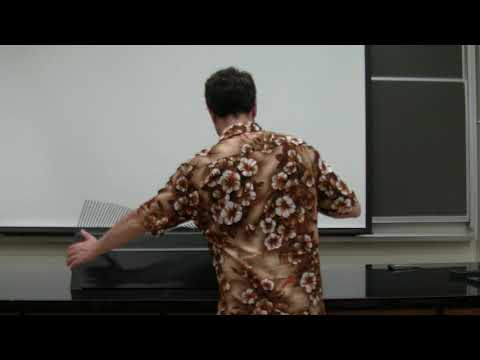

In [12]:
YouTubeVideo('Ki70ShYFtmA', width=560, height=315)

So, you have discrete oscillators, and you can see their modes appearing by forcing them at their resonant frequency, and they really look like modes of waves on a string! 

To further drive my point home, let me animate our chain of masses and spring again, but I will limit myself to one mode only, and I will plot the $x$-position of the masses for that given mode on the $y$-axis.

In [13]:
def plot_one_mode(NFs, EVs, m):
    """ INPUTS:
    NFs, EVs: the normal frequencies and eigenvectors as computed before
    m: which mode we want to animate (integer)
    this way of doing an nimation is more directly taken from
    https://matplotlib.org/stable/api/animation_api.html
    """

    N = len(NFs)  # the total number of masses is also the number of frequencies
    x_n = np.zeros(N + 2)  # N+2 positions; +2 to add the left and right walls

    seq = np.argsort(NFs)  # re-do it to limit input/output
    mm = seq[m-1]  # this will select the correct mode in the list
    Amp = abs(EVs[:, mm]).max()  # amplitude of the mode, more or less
    t_end = 2*np.pi/NFs.min()  # one period associated with the lowest frequency
    time = np.arange(0., t_end, t_end/200)  # our time array

    rest_positions = range(N+2)  # for our x-axis

    imagelist = []  # list of frames to eventually animate

    fig, ax = plt.subplots(figsize=(6, 3))
    ax.grid()
    ln, = plt.plot([], [], 'o-')

    def init():
        ax.set_xlim(0, N+1)
        ax.set_ylim(-1.1*Amp, 1.1*Amp)
        ax.set_xlabel('$n$, the mass number')
        ax.set_ylabel('$y_n$, the deviation from rest position')
        ax.set_title('Mode number {0:d} for {1:d} masses'.format(m, N))
        plt.tight_layout()
        return ln,

    def update(frame):
        for n in range(N):  # the mass index; we leave the ends attached
            x_n[n+1] = EVs[n, mm]*np.cos(NFs[mm]*frame)
        ln.set_data(rest_positions, x_n)
        return ln,

    ani = animation.FuncAnimation(fig, update, frames=time, init_func=init, interval=100, blit=True)
    
    plt.close()

    return ani

In [14]:
# Show the animation
mode = 2
ani2 = plot_one_mode(eigfreqs, eigvecs, mode)
HTML(ani2.to_html5_video())

<Figure size 640x480 with 0 Axes>

In [15]:
# Save the animation
ani2.save('mode_{0:02d}_for_{1:02d}_masses.mp4'.format(mode, N), dpi=100)

<Figure size 640x480 with 0 Axes>

In this section, we make the connection with continuous waves.

Imagine that there are now an extremely large number $N$ of masses, and that they are aligned over a distance $L$.
The distance $a$ between two masses is therefore $a = L/(N+1)$, with $a\ll L$.
You can see this as a model for longitudinal vibrations in a one-dimensional crystal.
The wavelengths of such waves in crystals are typically on the order of a metre, while the distance between atoms is typically on the order of $10^{-10}$ m.
This, and the animation of modes we just saw, suggests that we could try to find a continuous function on $[0, L]$ to represent the deviations from rest of each mass, but we need to introduce a few new notations first, otherwise $x$ will mean too many things (the length along the chain, the deviation from rest position...).

Let

* $x$ be the *total* distance from the beginning of the chain,
* $x_n(t)$ the *total* distance of mass number $n$ from the beginning of the chain,
* $x_{n0} = na$ the rest position of mass number $n$, with $1\leq n \leq N$,
* $y_n(t) = x_{n}(t) - x_{n0}$.

**Word of warning:** I have re-defined what $x_n$ meant from the beginning of this lecture. This is to prepare to the study of waves.

The game here is to find a continuous function $y(x, t)$ such that at every moment, $y(x_{n0}, t) = y_n(t)$.
That is, a function that takes in the rest position $x_{n0}$ and time $t$ as argument, and tells us how far the mass from its rest position.

In a way, you can see this as an anti-discretization: we started from a discrete set of oscillators, and are now looking to describe them with a continuous function.

Let's consider again our long chain of $N$ masses and $N+1$ springs moving longitudinally, and let's look at the $n^\text{th}$ mass along that chain.
It can be any mass as long as it's not the first nor the last ($1< n <N$).
Its equation of motion is equation \eqref{eq:nthmass}, reproduced below with our new notations:
\begin{equation}
    m \ddot y_n = k(y_{n+1} -2y_n + y_{n-1}) \quad\Leftrightarrow\quad \ddot y_n = \frac{k}{m}(y_{n+1} -2y_n + y_{n-1}). \label{eq:ddotxi}
\end{equation}

Thinking about the crystal again, we can limit ourselves to the study of modes whose "wavelengths" (i.e., twice the distance between two nodes) are much larger that $a$.
In this case, consecutive $\xi_n$'s are very close to one another, and we can do Taylor expansions in $a$,
\begin{align*}
    y_{n+1}(t) = y(x_{n0}+a, t) & \approx y(x_{n_0}, t) + \left. a\pde{y}{x}\right|_{x=x_{n0}} + \left.\frac{a^2}2\pden{2}{y}{x}\right|_{x=x_{n0}}\\
    \text{and similarly,}\quad y_{n-1}(t) & \approx y(x_{n0}, t) - \left. a\pde{y}x\right|_{x=x_{n0}} + \left. \frac{a^2}2\pden2 y{x}\right|_{x=x_{n0}}.
\end{align*}

Plugging everything back into equation \eqref{eq:ddotxi}, we obtain
\begin{equation}
    \ddot \xi_n \approx \frac{ka^2}m\left.\pden2\xi{x}\right|_{x=x_{n0}}. 
\end{equation}

## Applying the continuum approximation

To complete our continuum approximation and let $N\to\infty$, or equivalently, $a\to 0$, we need to make a few adjustments.

We will treat each location $x$ as the resting position of a fictitious mass, and therefore replace all $x_{n0}$'s with $x$, and every $y_n(t)$ with $y(x, t)$.
And then, we need to turn our discrete masses and stiffnesses into quantities that will measure the properties of our medium.

### Mass density

We can't just add up masses, otherwise the total mass will tend to infinity.
If our chain of oscillators is to represent a continuous medium, then each mass needs to tend to zero, so that the mass density of the chain,
$$\mu = \frac{m}a,$$
remains finite.

### A measure of how hard it is to deform the whole chain

We can't just add up springs that all have the same constant stiffness $k$, because what would happen in this case?
Imagine you take the last mass on the chain, move it by a distance $X$, and find a way to immobilize all other masses to their new resting position so that the chain is now still in this new state.
What is the force on the mass?
We have seen in a tutorial that if you link two springs $k_1$ and $k_2$ in series, their collective stiffness becomes $1/K = 1/k_1 + 1/k_2$, and if they are identical, $K = k/2$.
Same for $N+1$ springs: $K= k/(N+1) \to 0$.
In the tutorial, we did not have any mass between the springs, but it doesn't matter because the spring force that the mass experiences is really the spring force immediately to its left and right, regardless of whether there is a mass at the end of each spring.
So, the mass in the middle experiences vanishing forces on both sides, which is of course not true: it is very difficult to deform a solid.
The stiffness we need to use therefore has to take into account the distance $a$.
    
To solve this problem, let's just imagine pulling the *entire* chain with a tension $F$, such that the resulting elongation of the total chain is $\ell$.
The relative elongation is therefore $\ell/L$, and it is the same as the relative elongation of each spring, $\Delta y/a$.
Similar to Hooke's law defining the spring stiffness $k$, we define the "stretching modulus" of the chain $\sigma$ such that
$$F = -\sigma \frac{\ell}L.$$
The parameter $\sigma$ works for our purpose because it measures a global property of the medium.
More specifically, it measures the medium's resistance to compression or elongation.

Following the law of the springs in series, we also know that Hooke's law says
$$F = -\frac{k}{N+1}\ell = -\sigma \frac{\ell}L \thrfor k = \sigma \frac{N+1}{L} = \frac{\sigma}a$$

## The wave equation for longitudinal waves

We now have the mass density $\mu$ and the stretchiness modulus $\sigma$.
Those are properties of the medium: they are the true parameters here, not $m$ or $k$.

The angular frequency squared $\omega_0^2$ then becomes
$$\omega_0^2 = \frac{k}{m} = \frac{\sigma}a\frac{1}{\mu a} = \frac{\sigma}{\mu a^2}.$$


Under these conditions, the last equation becomes the canonical wave equation,
\begin{equation}
    \boxed{\pden2{y}t - v^2\pden2y{x} = 0},\with v = \sqrt{\frac{\sigma}{\mu}}.
\end{equation}

I only framed the first equation because it is uber-general in physics.
What $y$ and $v$ are will vary from context to context, but the equation is the wave equation, and it always looks like this in 1D.

The parameter $v$ is the so-called *phase speed* of the waves.
You can check the units: $\sigma$ has units of Newton (see the equation where we defined it: it has the same units as the tension $T$), i.e., units of $\text{kg}\,\text{m}\,\text{s}^{-2}$, and $\mu$ has units of $\text{kg}\,\text{m}^{-1}$.
Their ratio therefore has units of $\text{m}^2\,\text{s}^{-2}$, and $v = \sqrt{\sigma/\mu}$.

It is the speed at which disturbances propagate along the chain, and we treat it as a constant.

*Note: "stretchiness modulus" is of course not a scientific term, I made it up. In a more realistic 3D crystal, I would actually have introduced Young's modulus $E = k/a$, or elasticity modulus, instead of $\sigma = ka$.
I would also have been using the mass density $\rho = m/a^3$ rather than $\mu = m/a$.
The phase speed would then have been $v = \sqrt{E/\rho}$. See French chap.5, p.151, for a discussion.*

# The phase speed

We are still on our journey to find the continuous function $y$ that can model each mode independently, but let's pause for a second and discuss this "phase speed" that showed up, because it's important.
While the wave equation has the same form in many contexts, the definition of $v$ varies from field to field.

* Transverse waves on a taut string, which you probably saw in 1st year or before: $v = \sqrt{F/\mu}$, with $F$ the along-axis tension force [in N] and $\mu$ the mass per unit length of the string [in kg.m$^{-1}$]. For a violin E string (the skinniest I think), $F \approx 68$ N, $\mu \approx 0.126$ g for $33$ cm long, or $3.8\times 10^{-4}$ kg.m$^{-1}$, and $v \approx 420$ m.s$^{-1}$.
* EM waves in a vacuum: $v = c \approx 3\times 10^8$ m.s$^{-1}$.
* Water waves whose wavelength is much longer than the depth, like ocean swell or tsunamis, $v = \sqrt{gh}$, with $g$ the gravitational acceleration [in m.s$^{-2}$] and $h$ the water depth [in m]. Over the deep sea, where $h \approx 5$ km, $v\approx 220$ m.s$^{-1} \approx$ 800 km.h$^{-1}$. This is faster than the speed of sound, but again, remember that waves don't carry water around. It is not that crazy. It means that a Tsunami originating in Japan will take 10 hours to arrive on Canada's West coast;
* Sound waves: $v = 340$ m.s$^{-1}$ in air; in water $\sim 1,500$ m.s$^{-1}$;
* Seismic primary (or pressure) waves ($\approx$ sound waves) in the Earth's Crust: $v\approx 6-8$ km.s$^{-1}$. They are longitudinal waves.
* Seismic secondary (or shear) waves in the Earth's crust: $v\approx 3-4$ km.s$^{-1}$. They are transverse.

I find the first example, waves on a string, to be easier to visualize, so I'm going to switch to this type of waves from now on.
They are easier to visualize because they are transverse: we see the displacement as motion that is perpendicular to the string.

Let me recall their equation of propagation,
$$ \boxed{\pden2yt = v^2\pden2yx}, \with v = \sqrt{\frac{F}{\mu}}$$
and $y(x,t)$ is the distance from axis at location $x$ and time $t$, which makes the waves "transverse" (see figure in Appendix).
I will not derive it here because we already saw one wave derivation, but the calculation is not hard and you can see it in the appendix.

*Note that we usually use $T$ to denote the tension instead of $F$, and most problems you will solve might use this notation. I prefer to use $F$ to avoid conflicts with the period of oscillation $T$. Be on the lookout for possible typos: because I work with books that use $T$ for the tension, I may keep writing it sometimes. Those are mistakes that I will try to correct.*

The speed $v$ is the speed at which the disturbance propagates along the string, and we treat it as a constant.
To understand this concept, imagine launching a wave pulse on a long rope, and imagine that somehow, the motion of your hand described a "Gaussian pulse", namely, $y(t) = A\exp[-(t-t_0)^2/\sigma_t^2]$.
This function means that your hand motion went from 0 at $t \ll t_0$ to $A$ at $t=t_0$ and back to 0 for $t \to \infty$, and that the motion typically lasted a duration of $2\sigma_t$.
This function look like a bell curve and is one of the most frequently encountered functions in physics.

Assuming that the waves on the rope are not too dispersive, i.e., the pulse retains it shape (we will see later what this means more precisely), then the shape of the pulse on the rope will be
$$ y(x, t) = A \exp\left[-\left(\frac{x - vt}{\sigma_x}\right)^2\right] = A \exp\left[-\left(\frac{t - x/v}{\sigma_t}\right)^2\right],$$
i.e, it will look like a Gaussian function in space, propagating with a speed $v$, with a typical spatial width of $2\sigma_x = 2v\sigma_t$, but also in time, with a typical temporal width $2\sigma_t$.

In [16]:
def plot_pulse():
    # We can plot this
    import numpy as np
    import matplotlib.pyplot as plt

    x = np.linspace(-1., 5.0, 1024)  # a 4-m long rope
    sigma_x = 0.5  # typical width of pulse
    A = 1.  # amplitude of diplacement 1 m (just for illustration purposes)
    v = 1.  # propagation velocity 1 m/s (for illustration purposes)
    t0 = 0.  # time of first snapshot
    t1 = 2.  # time of second snapshot
    ftsz = 13  # the font size

    y_t0 = A*np.exp(-((x - v*t0)/sigma_x)**2)
    y_t1 = A*np.exp(-((x - v*t1)/sigma_x)**2)

    plt.figure()
    ax = plt.gca()
    ax.plot(x, y_t0, 'b', label='pulse at $t=t_0$')
    ax.plot(x, y_t1, 'r--', label='pulse at $t=t_0+\Delta t$')
    ax.set_xlabel('$x$ [m]', fontsize=ftsz)
    ax.set_ylabel('$y/A$', fontsize=ftsz)
    ax.grid()

    # annotation to highlight the spatial width of pulse
    ax.plot(2*[-sigma_x], [0.5/np.exp(1), 1.3/np.exp(1)], 'k')
    ax.plot(2*[sigma_x], [0.5/np.exp(1), 1.3/np.exp(1)], 'k')
    ax.annotate(text='', xy=(-sigma_x, .3), xytext=(sigma_x, 0.3),
                arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax.text(0., 0.3, r'$2\sigma_x$',
            verticalalignment='center', horizontalalignment='center',
            backgroundcolor='w', fontsize=ftsz)

    # annotation to highlight the distance travelled during Delta t
    ax.axvline(0., color='k', linestyle='--')
    ax.axvline(v*(t1-t0), color='k', linestyle='--')
    ax.annotate(text='', xy=(0., .8), xytext=(v*(t1-t0), 0.8),
                arrowprops=dict(arrowstyle='<|-'))  # the double arrow
    ax.text(0.5*v*(t1-t0), 0.8, r'$v\Delta t$',
            verticalalignment='center', horizontalalignment='center',
            backgroundcolor='w', fontsize=ftsz)

    plt.legend(loc='center right')
    plt.autoscale(enable=True, axis='x', tight=True)
    
    return

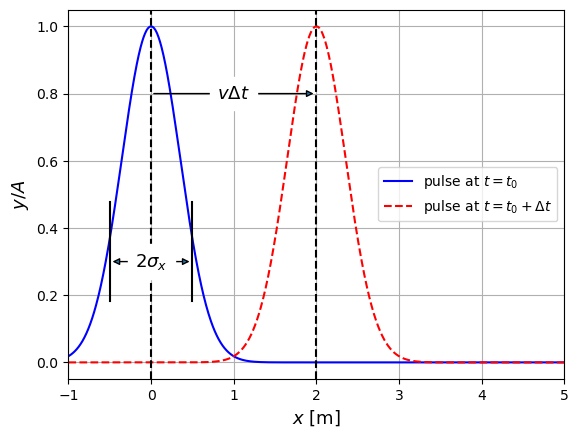

In [17]:
plot_pulse()

# Normal modes of the wave equation

## Setup

To get warmed up, let's watch a couple of videos of our go-to set-up: the wave on a string. I recorded three demos, shown below and also at
* https://youtu.be/bcIeaNoB880
* https://youtu.be/DL47_MbRPmc
* https://youtu.be/_am6ogAuSjc

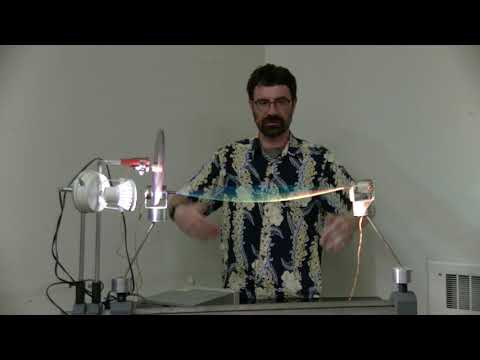

In [18]:
YouTubeVideo('bcIeaNoB880', width=560, height=315)

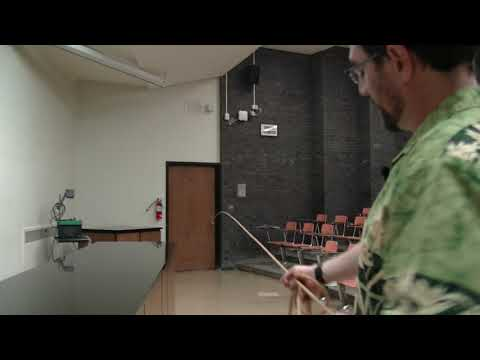

In [19]:
YouTubeVideo('DL47_MbRPmc', width=560, height=315)

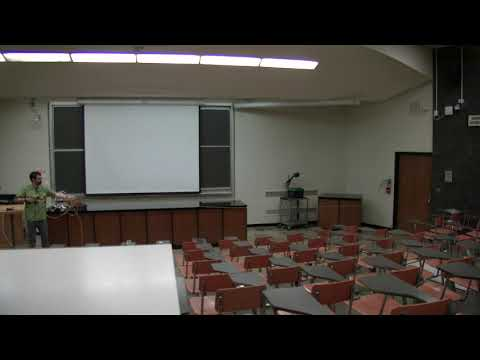

In [20]:
YouTubeVideo('_am6ogAuSjc', width=560, height=315)

This is where we finally find solutions to our wave equation, in one specific case: the two ends of our chain of oscillators, or the two ends of our string, are tied.
That is, we solve the problem
$$\pden2yt = v^2\pden2yx,\with y(x=0) = y(x=L) = 0,$$
where $x=0$ and $x=L$ are the locations of the wall.

## General expression

We focus on *standing waves*, traveling waves' evil twins.
The key step is to **assume a form of the solutions to the wave equation in which the variables are separable**:
$$ \boxed{y(x, t) = f(x) h(t)}.$$

Note: another try, another mathematical trick. How could you come up with it? You don't have to. As a researcher, I can tell that it is one of the easiest and therefore first things to do when one doesn't know anything about the solution.

Nevertheless, you *could* have come up with it based on the videos: each mass on the chain, or each point on the string, oscillates at a certain frequency $\omega$, with a certain amplitude $A$ ($A$ can be negative here or nothing will make sense).
So, you could write the oscillation at each point as $A\cos(\omega t + \phi)$.
But the amplitude varies with location: $A(x)$, and you could even surmise that it does so sinusoidally, $A(x) = \cos(kx +\psi)$, though that's what we are about to prove. What is clear on the videos is that $A(x)$, and not $A(x, t)$.
Moreover, $A$ does not evolve in time, and nothing about the time-oscillating part depends on $x$ (not even $\phi$: the masses/location move either in phase or out-of-phase, but that's a sign difference that only depends on $x$ and can thus be incorporated in $A(x)$).
So, we do have a variable-separated set of oscillations.

With this assumption/educated guess in mind,
$$ \pden2yt = f(x)\oden2{h(t)}t = f(x)\ddot h(t) \andeq \pden2yx = h(t)\oden2{f(x)}x = h(t)f''(x), $$
and the wave equation becomes
$$  f(x)\oden2{h(t)}t = v^2 h(t)\oden2{f(x)}x. $$

The usefulness of this form is not apparent until after division by $f(x)h(t)$, i.e.
$$ \frac{1}{h(t)}\oden2{h(t)}t = v^2 \frac{1}{f(x)}\oden2{f(x)}x. $$

Looking at the equation closely, one notices that the LHS only depends on $t$, while the RHS only depends on $x$ (recall that $v$ is constant).
The only way for two functions that depend on two different variables to be equal to each other is for both of them to be equal to a constant, i.e.,
$$ \frac{1}{h(t)}\oden2{h(t)}t = v^2 \frac{1}{f(x)}\oden2{f(x)}x = -\omega^2. $$

Why $-\omega^2$? Because, for example,
$$ \frac{1}{h(t)}\oden2{h(t)}t = -\omega^2 \thrfor \boxed{\ddot h(t) + \omega^2 h(t) = 0}. $$
This is the **same equation as an SHO**, and the solution is still
$$ h(t) = h_0\cos(\omega t + \phi). $$

Likewise,
$$ f(x) = f_0\cos(kx + \phi_f), \quad \textrm{with} \quad k = \omega/v. $$

**Notation change alert:** $k$ is now a wavenumber, in rad.m$^{-1}$, **not** a spring stiffness anymore.

In this lecture however, it will be easier for us to write the expression above as
$$ f(x) = A \cos(kx) + B \sin(kx). $$

Can we write 
$$ y(x, t) = h_0 \cos(\omega t + \phi)\left[ A \cos(kx) + B \sin(kx) \right] $$
yet?
Not quite, because $\omega$ and $k$ can take many values.
As we are about to see, for a given set of boundary conditions, there is a discrete but infinite number of possible solutions for $f$ and $h$.

## Boundary conditions

Let $x=L$ and $x=0$ be the locations of the walls.
Mathematically, the statement translates into:
$$ y(t, 0) = y(t, L) = 0 \thrfor f(0) = f(L) = 0.$$

$$ f(0) = A\cos0 + B\sin0 = A = 0. $$
$$ \thrfor f(L) = B\sin(kL) = 0 \thrfor kL = n\pi, \ n\in \mathbb N^*. $$
$\mathbb N^*$ means that zero is excluded.
Indeed, because $k = \omega/v$, $k=0\Rightarrow\omega = 0$, i.e., it is a trivial, non-oscillating solution.

Consequently, an infinite number of $k$'s can satisfy the wave equation when both ends are attached:
$$ \boxed{k_n = \frac{n\pi}L, \quad n\in \mathbb N^*}. $$

Recall that $k = \omega/v$, therefore, the set of frequencies is also a countably infinite set:
$$ \boxed{\omega_n = \frac{n\pi v}L, \quad n\in \mathbb N^*}. $$

The corresponding solution for a given $n$ is therefore
$$ y_n(t, x) = C_n \cos(\omega_n t + \phi_n)\sin(k_n x). $$
Such a partial solution is a **mode of vibration** of the string.
It is of course the equivalent of the normal modes of the coupled systems of oscillators.
There is now an infinite number of them, because the string is a continuous system that can be viewed as an infinite number of coupled oscillators.

Like for coupled oscillators, any solution can be written as a linear combination of a countably infinite set of **modes**, i.e.,
$$ \boxed{y(t, x) = \sum_{n = 1}^{\infty} C_n \cos(\omega_n t + \phi_n)\sin(k_n x)}.$$

In [21]:
N = 4  # number of modes I want to display
L = .33  # length of string: 33 cm
F = 68  # tension in the string: 68 N
mu = 0.125/L  # mass per unit lenght of the string

x = np.linspace(0., L, 128)  # the x array
v = np.sqrt(F/mu)  # phase speed
k1 = np.pi/L  # the fundamental k; k_n = n*k0 and omega_n = n*v*k0

k = [n*k1 for n in range(1, N+1)]  # the list of k's
omega = [n*k1*v for n in range(1, N+1)]  # the list of k's
C = [0.2+0.3/n for n in range(1, N+1)]  # amplitude decreases with n for illustration
f_modes = {}  # we will store the modes into a python structure called dictionary
# f_modes only stores the spatial information
for n in range(N):
    f_modes[n] = np.sin(k[n]*x)

In [22]:
# Various quantities
t_end = 2.*np.pi/(omega[0]) # time array spans one fundamental frequency
n_frames = 50  # number of frames for animation
time = np.linspace(0., t_end, n_frames)  # time array
ftsz = 13  # the font size

imagelist = []  # list of frames to eventually animate

# Animation
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0., 1.])
ax.set_ylim([0.5, N+0.5])
ax.set_xlabel('$x/L$', fontsize=ftsz)
ax.set_yticks(range(1, N+1))
ax.set_ylabel('$y_n(t, x) + \mathrm{ mode\ number\ } n$', fontsize=ftsz)
ax.grid()

x_positions = np.tile(x, (N, 1))/L  # replicate the x array N times
y_modes = np.zeros((N, len(x)))  # nx positions for N modes
first_iteration = True  # I will want to save the first picture for the pdf notes
for t in time: # We loop over time to animate the modes
    for n in range(N):
        y_modes[n, :] = 1 + n + C[n]*f_modes[n]*np.cos(omega[n]*t)
    im = plt.scatter(x_positions, y_modes, c=y_modes, cmap='copper')
    imagelist.append([im])

# Creation of the animation
ani = animation.ArtistAnimation(fig, imagelist, interval=40, blit=True, repeat_delay=1000)
plt.close()

In [23]:
# Show the animation
HTML(ani.to_html5_video())

In [24]:
# Save the animation
ani.save('VibrationModes.mp4')

Here are a few important remarks.

* Those points where the string doesn't move are called **nodes**.
* Those points in-between where the string moves with the largest amplitude are called **antinodes**. I might call them bellies. It is *not* standard practice to do so.
* The mode with no nodes ($n = 1$ here) is called the **fundamental** (mode), or **first harmonic** (but really, "fundamental" is more standard). It is originally a musical term, I guess, as in, it corresponds to the gravest sound an instrument of piece of instrument can produce. The one with one node ($n = 2$) is called the **second harmonic**, and so on.
* The $n^{th}$ harmonic has $n-1$ nodes, and $n$ antinodes.
* $k_n$ is called the **wavenumber** of the $n^{th}$ mode, $$\boxed{\lambda_n = \frac{2\pi}{k_n}} = \frac{2L}n $$ is its **wavelength**. The units of $k_n$ are rad.m$^{-1}$ and those of $\lambda_n$ are m (metres).

***

**Worked example (from King, p.143):** 

[A string] of a cello has a linear density $\mu = 1.70$ g.m$^{-1}$ and a length $L = 0.70$ m.
The tension in the string is adjusted so that the fundamental frequency is 220 Hz.

1. What is the tension in the string?
2. A weight of mass $m$ is suspended from the string. What mass would produce the same tension? 
3. What is the wavelength of the sound from the string?

Take the velocity of sound in air to be 340 m.s$^{-1}$ and the acceleration due to gravity to be 10 m.s$^{-2}$.

**Solution:**

1. $\lambda \nu = v$ and $\lambda/2 = L$ for the fundamental frequency, giving $v = 2L\nu$.
    $$F = \mu v^2 = \mu(2L\nu)^2 = \frac{1.70}{1000}\times (2 \times 0.70 \times 220)^2
= 161\text{ N}.$$
2. $m = F/g = 16.4$ kg.
    This result illustrates the fact that stringed instruments are subject to large forces.
3. The frequency of the sound wave is the same as the frequency of the vibrating string. Hence, the wavelength of the sound wave is equal to $340/220 = 1.54$ m.
    This is different to the wavelength of the fundamental of the string ($= 2L = 1.40$ m) because of the different wave velocities in the string and in air.

***

We made the transition from a formalism that involves linear algebra and eigenmodes to one that involves continuous functions.
You may find the wave formalism easier than the linear algebra one, but that is an illusion: the linear algrebra one is arguably simpler, *everything else being equal*. 
Because it was so simple, I was able to talk about complicated situations (oscillators with different masses, etc.). 
Here, with waves, I had to stick to the most basic case, i.e., a string with a uniform mass density $\mu$ (a varying one would be like varying the masses along the chain of oscillators). 
If I had to studied a string that was heavier on some parts (like a whip that gets thinner away from the handle, or a knotted string), then I would have need to pull out a mathematical arsenal that would make eigenvalue problems sound like a joke: things like Wentzel-Kramers-Brillouin or Sturm-Liouville theories, asymptotic expansions, and so on.
We would have been looking for "eigenfunctions" (instead of eigenvectors) of "linear operators" (instead of linear tranformations), based on orthogonality properties defined by "inner products" (instead of dot products). 

If (and only if) you want more info about the connection between linear algebra and the mode calculations I did, see the nice video below (https://youtu.be/TgKwz5Ikpc8, in particular, you will notice that I paraphrased the author at around 11:10).

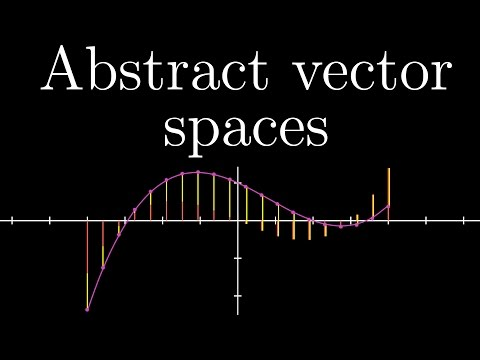

In [25]:
YouTubeVideo('TgKwz5Ikpc8', width=560, height=315)

## What about different boundary conditions?

*Time permitting; treat it as a worked example.*

The conditions where the two ends are attached were just one of the possibilities for boundary conditions.
Another common one is when the ends are *not* attached, i.e., when there is no force at the ends of the string.
This is the case for the chain of pendulums for which I recorded a demo earlier.

The force applied by one piece of the string to the next is the tension force $\vec F$, and when projected in the $y$-direction, it is $F_y = F\sin\theta$, where $\theta$ is the local angle of the string with the $x$-axis (see Appendix for more explanations and a figure).
And when angles are small,
$$F_y \approx F\theta \approx F\tan\theta = F\partial{y}/\partial x.$$
So, a boundary condition in which the end is not attached, i.e., a force-free boundary condition, is one for which
$$\left.\pde{y}x\right|_{end} = 0.$$

In computational physics, a boundary condition that prescribes the value of a function, $y|_{end} = A$, is called a *Dirichlet* boundary condition.
When it is the value of the derivative of that function that is prescribed, $\partial y/\partial x|_{end} = A$, then the boundary condition is called a *Neumann* boundary condition. Here, we are working with a Neumann boundary condition.

So, what happens when the ends are not attached, and
$$\left.\pde{y}x\right|_{x=0, L} = 0?$$
Then we re-boot the derivation for standing waves on a tied string:

* we still assume that we can write $y(t, x) = f(x)h(t)$,
* $h = h_0\cos(\omega t + \phi)$ is still true,
* $f(x) = A\cos(kx) + B\sin(kx)$ also,

but things change after that.

Indeed,
$$ \left.\pde{y}x\right|_{t, x=0} = \left.\pde{y}x\right|_{t, x=L} = 0 \thrfor f'(0) = f'(L) = 0,$$
with
$$f'(x) = -k A \sin(kx) + k B \cos(kx).$$

Applying the B.Cs,
$$ f'(0) = -k A\sin0 + k B\cos0 = k B = 0. $$
$$ \thrfor f'(L) = -k A\sin(kL) = 0 \thrfor k L = n\pi, \ n\in \mathbb N^*. $$

Then, the function $f$ becomes
$$f(x) = A\cos(k_n x), \with k_{n}=\frac{\pi n}{L}.$$

In [26]:
# Let's plot the equivalent of a previous animation
N = 4  # maximum mode I want to display
L = .33  # length of string: 33 cm
F = 68  # tension in the string: 68 N
mu = 0.125/L  # mass per unit lenght of the string

x = np.linspace(0., L, 128)  # the x array
v = np.sqrt(F/mu)  # phase speed
k0 = np.pi/L  # the fundamental k; k_n = n*k0 and omega_n = n*v*k0

k = [n*k0 for n in range(1, N+1)]  # the list of k's
omega = [kn*v for kn in k]  # the list of k's
C = [0.2+0.3/n for n in range(1, N+1)]  # amplitude decreases with n for illustration

In [27]:
# Various quantities
t_end = 2.*np.pi/(omega[0]) # time array spans one fundamental frequency
n_frames = 50  # number of frames for animation
time = np.linspace(0., t_end, n_frames)  # time array
ftsz = 13  # the font size

imagelist = []  # list of frames to eventually animate

# Animation
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0., 1.])
ax.set_ylim([0.5, N+0.5])
ax.set_xlabel('$x/L$', fontsize=ftsz)
ax.set_yticks(range(1, N+1))
ax.set_ylabel('$y_n(t, x) + \mathrm{ mode\ number\ } n$', fontsize=ftsz)
ax.set_title('Neuman boundary conditions')
ax.grid()

x_positions = np.tile(x, (N, 1))/L  # replicate the x array N times
y_modes = np.zeros((N, len(x)))  # nx positions for N modes
first_iteration = True  # I will want to save the first picture for the pdf notes
for t in time: # We loop over time to animate the modes
    for n in range(N):
        y_modes[n, :] = 1 + n + C[n]*np.cos(k[n]*x)*np.cos(omega[n]*t)
    im = plt.scatter(x_positions, y_modes, c=y_modes, cmap='copper')
    imagelist.append([im])

# Creation of the animation
ani = animation.ArtistAnimation(fig, imagelist, interval=40, blit=True, repeat_delay=1000)
plt.close()

In [28]:
# Show the animation
HTML(ani.to_html5_video())

In [29]:
# Save the animation
ani.save('NeumanVibrationModes.mp4')

And what if we had the string attached on one end and free on the other?
Sounds like a good question for a tutorial. ;-)

# Summary

In this lecture, we saw:

* The normal modes and normal frequencies of two masses and three springs in longitudinal oscillations.
* The normal modes and normal frequencies of $N\gg 1$ masses and $N+1$ springs in longitudinal oscillations, solved numerically.
* When masses start to become large, each mode looks like the oscillation of a standing wave: each mass has a certain phase shift with the next mass, the patterns look smooth, and you have the nodes and antinodes you can see with oscillations of a wave on a string.
* When the number of oscillators becomes so large that the distance between them vanishes, we can do a continuum approximation, namely, we can replace all individual masses by the mass density $\mu$, and all individual stiffnesses by a constant that quantifies how hard it is to elongate a piece of material.
* When said continuum approximation is applied, $N$ individual equations turn into one wave equation.
* The wave equation:
    $$\pden2{y}t - v^2\pden2{t}x = 0,$$
    with $v$ the phase speed.
* The wave equation on a domain of finite length $L$ has an infinite number of modal solutions, each with their own wavenumber and angular frequency, and the general solution is a linear combination of some or all modes.
* The statements above all had direct equivalents for discrete assemblies of coupled oscillators.

# Appendix: derivation of the wave equation for the taut string

Let's break down the string into infinitesimally small slices, and let's consider in particular a piece of string that is located between $x_0$ and $x_0 + \delta x$.
The transverse displacements are along the $y$-axis, and we identify them as $y(x, t)$.
The string has mass per unit length $\mu$ (in kg/m), and is submitted to a tension $F$ (in N), which we treat as constant along the string.
At the ends of the tiny slice, the string makes an angle $\theta$ with the $x$-axis at $x_0$, and $\theta + \delta \theta$ at $x_0+\delta x$ (see figure below).

![](SmallStrand.png)

Newton says $m\vec a = \sum \vec F$, on that piece of string ($m = \mu \delta x$).
Actually, we are only interested in the transverse motion, i.e., $m\ddot y = \sum F_y$.

Therefore, let's consider the $y$-component of the tension, because it is the one that restores the position of the string to its resting, along-$x$ situation.
At $x=x_0$, the $y$-component of the tension is 
$$\left.F_y\right|_{x_0} = -F\sin\theta \approx -F\theta \approx -F\tan\theta = -F\left.\pde{y}x\right|_{x_0}.$$
The minus sign is because if $\theta > 0$, the force pulls in the negative direction (see fig. 1).
The successive approximations I made above work well in the small-displacements regime.
The regime corresponds to the **linear regime** of this physical system, which is the only one we study in this course.

Similarly, at $x=x_0 + \delta x$,
$$\left.F_y\right|_{x_0+\delta x} \approx F\left.\pde{y}x\right|_{x_0+\delta x}.$$
Note the positive sign this time, because the situation is opposite as before.

The slice is infinitesimally small, and we have no reason to believe that a discontinuity exists between $x_0$ and $x_0 + \delta x$ (if there is one, then we just pick a smaller $\delta x$).
For these reasons, we can Taylor-expand $\left.F_y\right|_{x_0+\delta x}$ into
$$ \left.F_y\right|_{x_0+\delta x} \approx F \left(\left. \pde{y}x \right|_{x_0} + \delta x \left. \pde{}x\pde{y}x \right|_{x_0} \right) = -\left.F_y\right|_{x_0} + \delta x \, F \left. \pden2{y}x \right|_{x_0}.$$

Neglecting all other forces like gravity, Newton then tells you that
$$ \mu \delta x \pden2yt = \left.F_y\right|_{x_0} + \left.F_y\right|_{x_0 + \delta} \approx \delta x \, F \left. \pden2{y}x \right|_{x_0}.$$